## Artificial Neural Network

### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/combined_data/cleaned_data.csv')



In [3]:
df.shape

(1042, 9)

<AxesSubplot: >

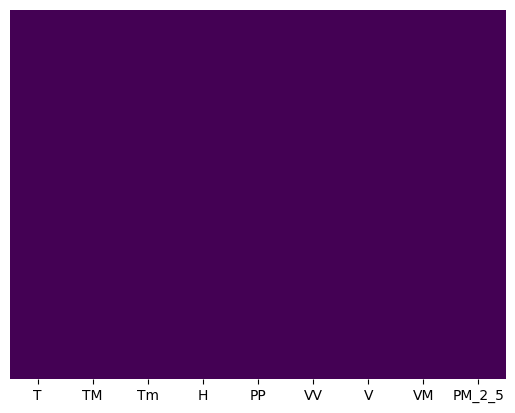

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

,T,TM,Tm,H,PP,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1037,False,False,False,False,False,False,False,False
1038,False,False,False,False,False,False,False,False
1039,False,False,False,False,False,False,False,False
1040,False,False,False,False,False,False,False,False


In [8]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1037    False
1038    False
1039    False
1040    False
1041    False
Name: PM_2_5, Length: 1042, dtype: bool

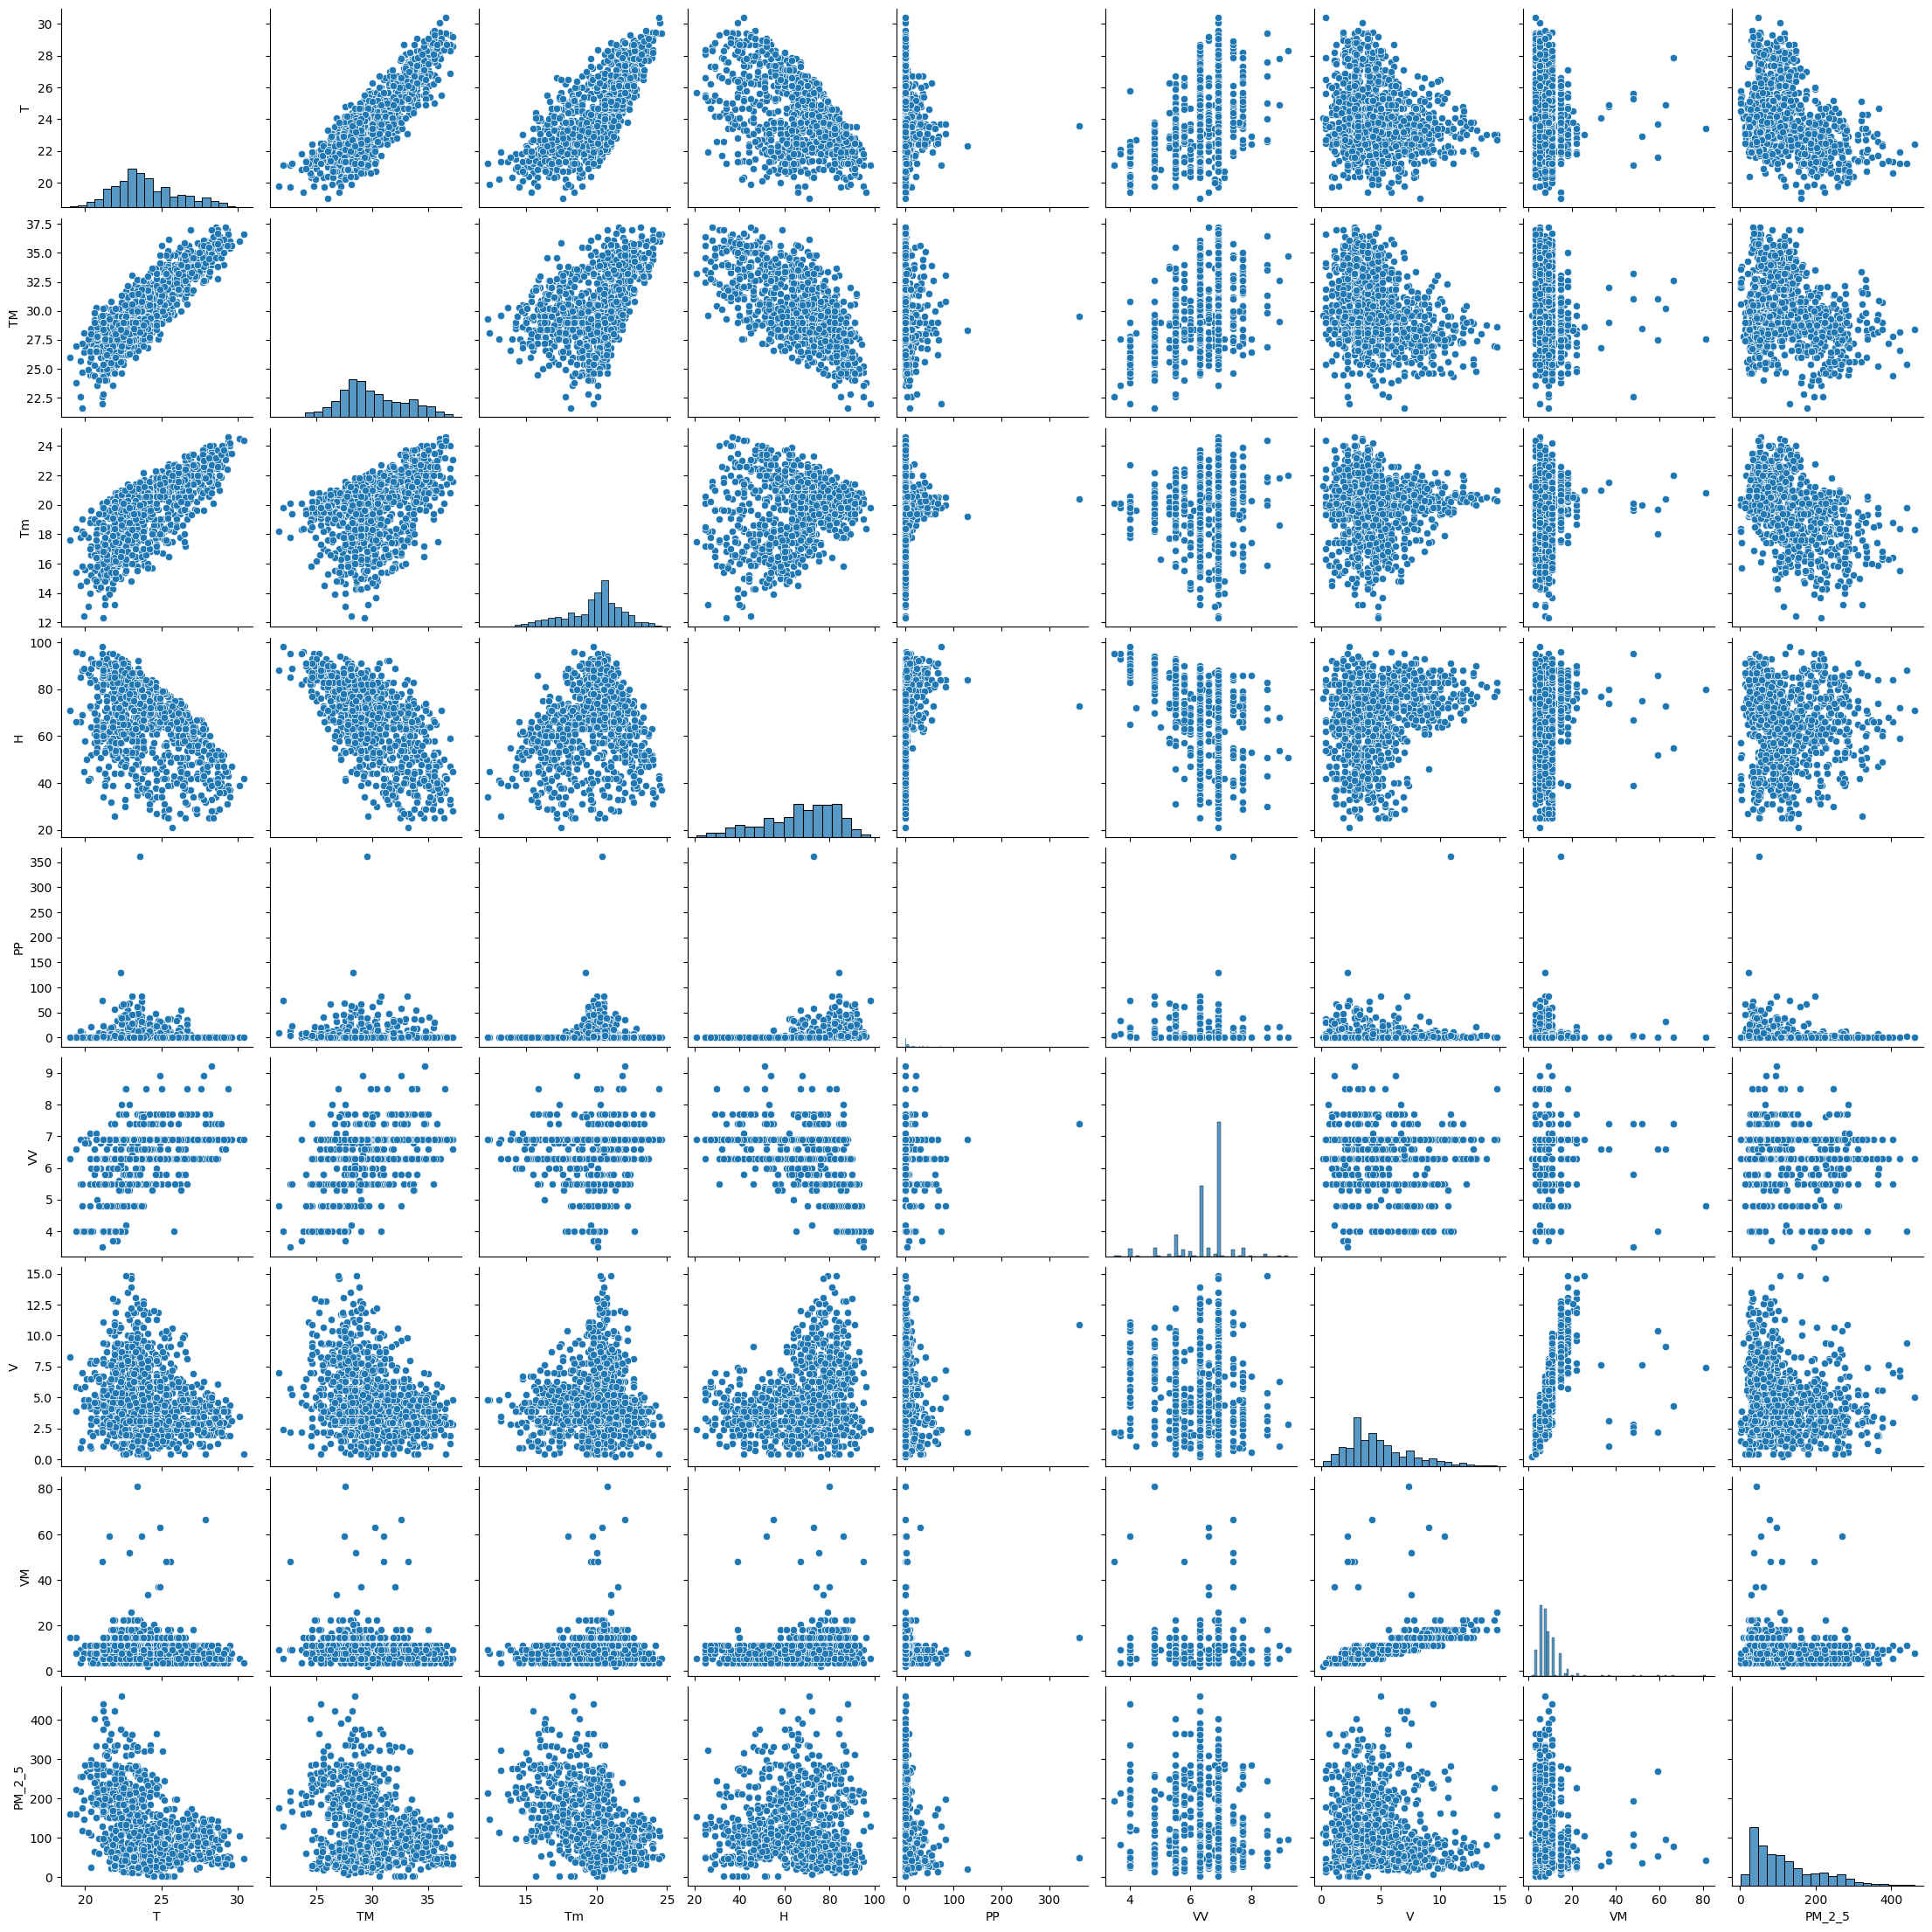

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
T,1.000000,0.852645,0.688650,-0.503010,-0.073524,0.378776,-0.204960,-0.087637,-0.379939
TM,0.852645,1.000000,0.395225,-0.664802,-0.065308,0.357372,-0.319439,-0.167917,-0.223088
Tm,0.688650,0.395225,1.000000,0.194090,0.049221,0.054877,0.066984,0.062041,-0.502202
H,-0.503010,-0.664802,0.194090,1.000000,0.229211,-0.414820,0.295650,0.174931,-0.123533
PP,-0.073524,-0.065308,0.049221,0.229211,1.000000,-0.092324,-0.014407,-0.006839,-0.137149
VV,0.378776,0.357372,0.054877,-0.414820,-0.092324,1.000000,-0.082290,-0.076309,-0.089485
V,-0.204960,-0.319439,0.066984,0.295650,-0.014407,-0.082290,1.000000,0.541716,-0.199252
VM,-0.087637,-0.167917,0.062041,0.174931,-0.006839,-0.076309,0.541716,1.000000,-0.161871
PM_2_5,-0.379939,-0.223088,-0.502202,-0.123533,-0.137149,-0.089485,-0.199252,-0.161871,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

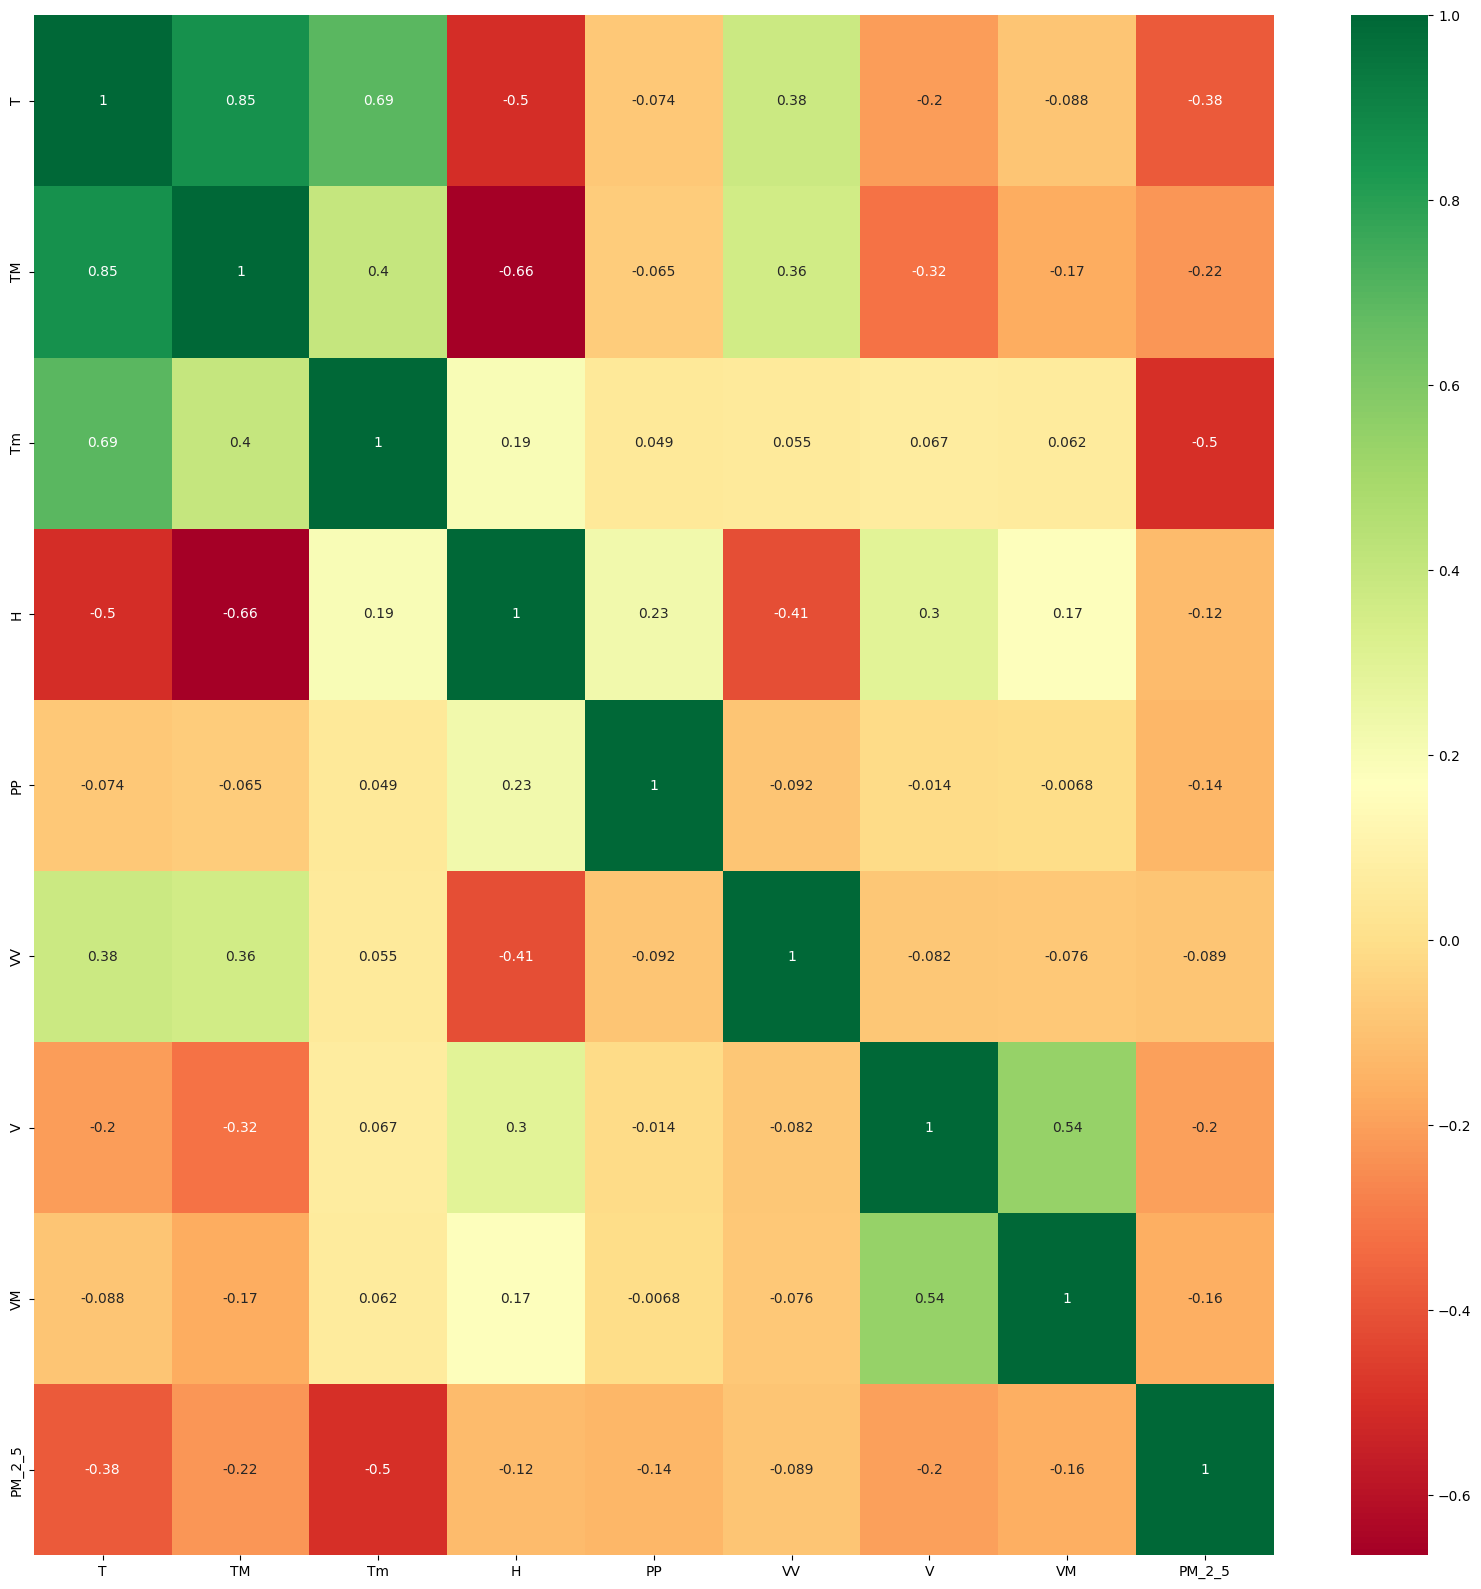

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'PP', 'VV', 'V', 'VM', 'PM_2_5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

,T,TM,Tm,H,PP,VV,V,VM
0,21.0,27.6,14.6,61.0,0.0,6.0,2.2,3.5
1,21.6,27.7,17.0,59.0,0.0,6.8,2.0,3.5
2,22.3,29.0,16.1,48.0,0.0,6.9,2.8,3.5
3,20.9,29.0,16.0,66.0,0.0,5.5,2.2,3.5
4,20.9,27.8,16.0,62.0,0.0,6.3,3.0,5.4


In [15]:
print(model.feature_importances_)

[0.18501312 0.10570228 0.29474907 0.10800418 0.06493958 0.06183408
 0.10604802 0.07370969]


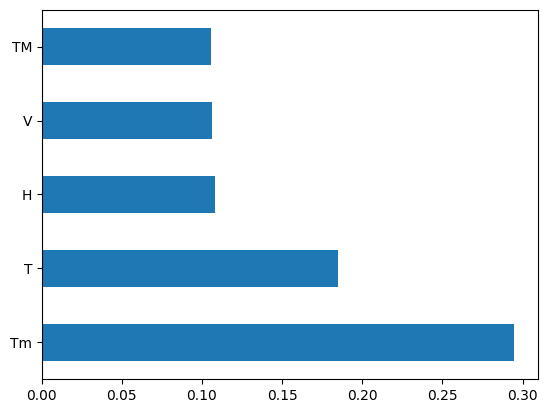

In [16]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### ANN

C:\Users\Divyansh Puri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='PM_2_5', ylabel='Density'>

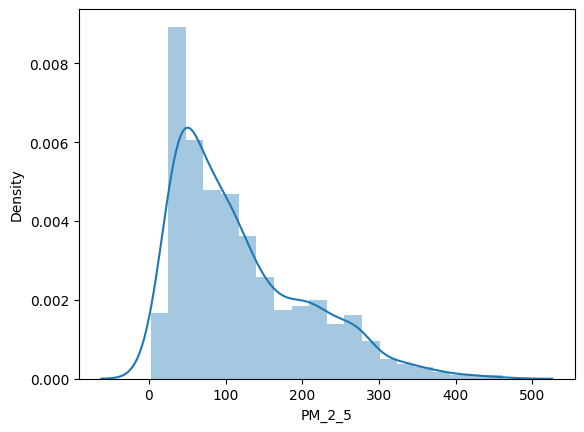

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [20]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
49/49 [==============================]

49/49 [==============================] - 0s 3ms/step - loss: 57.2253 - mean_absolute_error: 57.2253 - val_loss: 53.6128 - val_mean_absolute_error: 53.6128
Epoch 44/100
49/49 [==============================] - 0s 3ms/step - loss: 55.7290 - mean_absolute_error: 55.7290 - val_loss: 53.4795 - val_mean_absolute_error: 53.4795
Epoch 45/100
49/49 [==============================] - 0s 4ms/step - loss: 56.1201 - mean_absolute_error: 56.1201 - val_loss: 56.6856 - val_mean_absolute_error: 56.6856
Epoch 46/100
49/49 [==============================] - 0s 4ms/step - loss: 56.8755 - mean_absolute_error: 56.8755 - val_loss: 57.1769 - val_mean_absolute_error: 57.1769
Epoch 47/100
49/49 [==============================] - 0s 4ms/step - loss: 56.5127 - mean_absolute_error: 56.5127 - val_loss: 51.0372 - val_mean_absolute_error: 51.0372
Epoch 48/100
49/49 [==============================] - 0s 4ms/step - loss: 56.3475 - mean_absolute_error: 56.3475 - val_loss: 51.6091 - val_mean_absolute_error: 51.6091
Epoch

Epoch 92/100
49/49 [==============================] - 0s 4ms/step - loss: 52.8424 - mean_absolute_error: 52.8424 - val_loss: 47.5335 - val_mean_absolute_error: 47.5335
Epoch 93/100
49/49 [==============================] - 0s 3ms/step - loss: 52.0864 - mean_absolute_error: 52.0864 - val_loss: 49.6450 - val_mean_absolute_error: 49.6450
Epoch 94/100
49/49 [==============================] - 0s 4ms/step - loss: 55.1011 - mean_absolute_error: 55.1011 - val_loss: 50.7812 - val_mean_absolute_error: 50.7812
Epoch 95/100
49/49 [==============================] - 0s 4ms/step - loss: 53.4260 - mean_absolute_error: 53.4260 - val_loss: 49.2190 - val_mean_absolute_error: 49.2190
Epoch 96/100
49/49 [==============================] - 0s 3ms/step - loss: 53.8657 - mean_absolute_error: 53.8657 - val_loss: 49.4894 - val_mean_absolute_error: 49.4894
Epoch 97/100
49/49 [==============================] - 0s 4ms/step - loss: 52.0326 - mean_absolute_error: 52.0326 - val_loss: 53.8309 - val_mean_absolute_error: 

#### Model Evaluation

In [21]:
prediction=NN_model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [22]:
y_test

764      75.125000
214      80.291667
889     130.166667
634      30.666667
650      29.000000
           ...    
1034    152.833333
418      31.875000
465      85.750000
172     214.125000
695     200.645833
Name: PM_2_5, Length: 313, dtype: float64

C:\Users\Divyansh Puri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

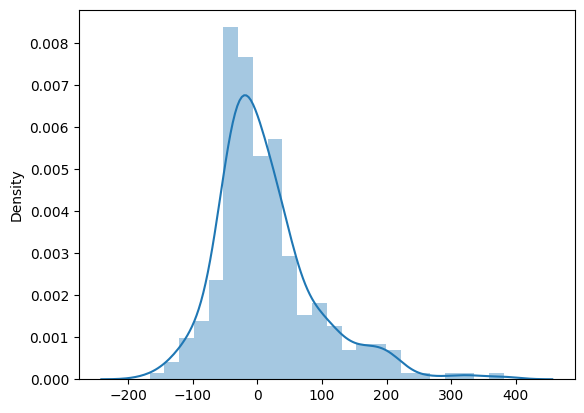

In [23]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

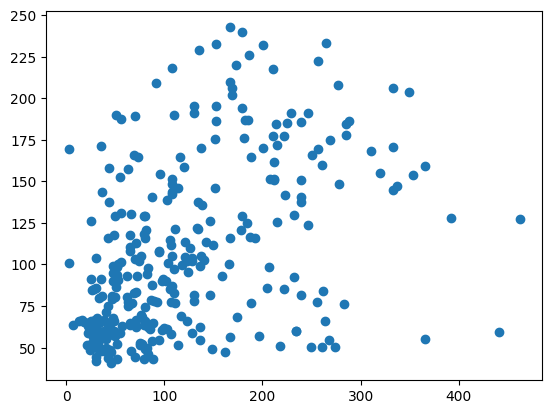

In [24]:
plt.scatter(y_test,prediction)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 55.978254070317554
MSE: 6346.277294847252
RMSE: 79.66352549848175


# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 55.978254070317554
MSE: 6346.277294847252
RMSE: 79.66352549848175


In [31]:
import pickle 

In [32]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump('rf_random', file)